In [30]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_hp= pd.read_excel('C:/Users/Manzoo/Learning/Day21/Assignments/dataset/Linear Regression.xlsx')
data_hp.head()
print(data_hp.shape)

(21613, 5)


In [ ]:

data_hp.isnull().sum()

##data_hp['bedrooms'] = data_hp['bedrooms'].replace([33],3)
##data_hp[data_hp['bedrooms'] ==33]

pd.hist(data_hp)

In [5]:
##Removing sqft_living outliers

data_hp = data_hp[data_hp['sqft_living'] < 12050]
print(data_hp.sort_values(by='sqft_living',ascending=False))


         price  sqft_living  bedrooms  bathrooms  floors
3914   7062500        10040         5       4.50     2.0
9254   6885000         9890         6       7.75     2.0
8092   4668000         9640         5       6.75     1.0
4411   5570000         9200         5       5.75     2.0
14556  2888000         8670         5       6.25     2.0
...        ...          ...       ...        ...     ...
4868    228000          390         0       1.00     1.0
18379   265000          384         0       0.75     1.0
860     245000          380         1       0.75     1.0
15381   276000          370         1       0.75     1.0
19452   142000          290         0       0.00     1.0

[21611 rows x 5 columns]


In [6]:
data_hp = data_hp[data_hp['bedrooms'] < 33]
print(data_hp.sort_values(by='sqft_living',ascending=False))

         price  sqft_living  bedrooms  bathrooms  floors
3914   7062500        10040         5       4.50     2.0
9254   6885000         9890         6       7.75     2.0
8092   4668000         9640         5       6.75     1.0
4411   5570000         9200         5       5.75     2.0
14556  2888000         8670         5       6.25     2.0
...        ...          ...       ...        ...     ...
4868    228000          390         0       1.00     1.0
18379   265000          384         0       0.75     1.0
860     245000          380         1       0.75     1.0
15381   276000          370         1       0.75     1.0
19452   142000          290         0       0.00     1.0

[21610 rows x 5 columns]


In [7]:
data_hp.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.700478,0.315080,0.522872,0.256991
sqft_living,0.700478,1.000000,0.591792,0.753219,0.353729
bedrooms,0.315080,0.591792,1.000000,0.528448,0.180468
bathrooms,0.522872,0.753219,0.528448,1.000000,0.500485
floors,0.256991,0.353729,0.180468,0.500485,1.000000


In [8]:
data_hp.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.396717e+05,2078.929338,3.369181,2.114230,1.494216
std,3.637142e+05,912.667656,0.907511,0.768129,0.539875
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.216125e+05,1425.500000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.062500e+06,10040.000000,11.000000,7.750000,3.500000


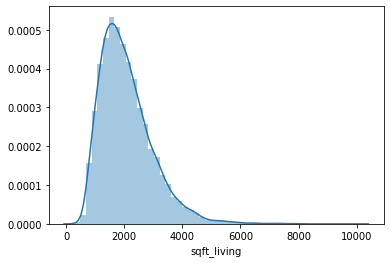

In [9]:
sns.distplot(data_hp['sqft_living'])

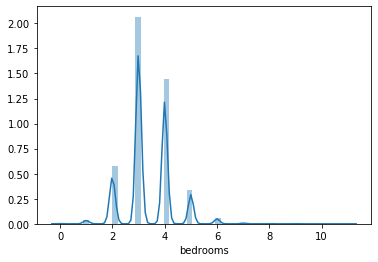

In [10]:
sns.distplot(data_hp['bedrooms'])

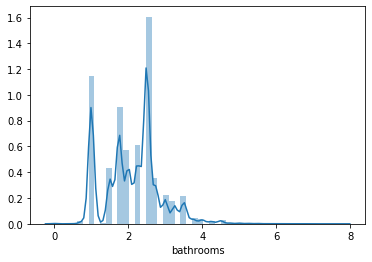

In [11]:
sns.distplot(data_hp['bathrooms'])

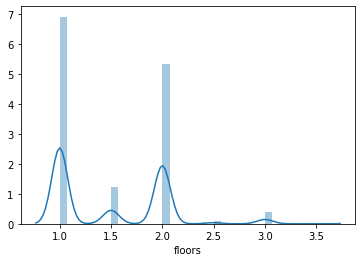

In [12]:
sns.distplot(data_hp['floors'])

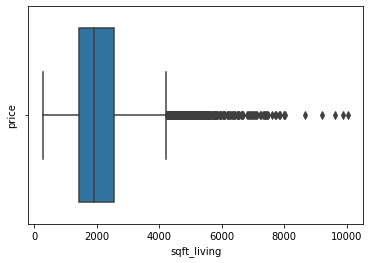

In [13]:
sns.scatterplot(x=data_hp['sqft_living'],y=data_hp['price'])
sns.boxplot(x=data_hp['sqft_living'])

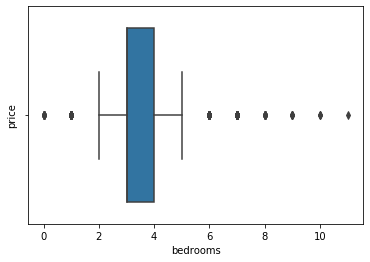

In [14]:
sns.scatterplot(x=data_hp['bedrooms'],y=data_hp['price'])
sns.boxplot(x=data_hp['bedrooms'])

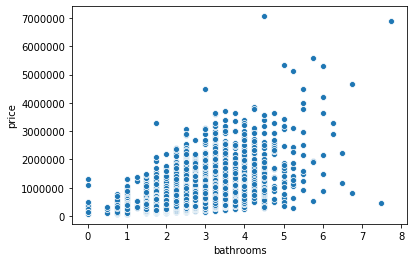

In [15]:
sns.scatterplot(x=data_hp['bathrooms'],y=data_hp['price'])

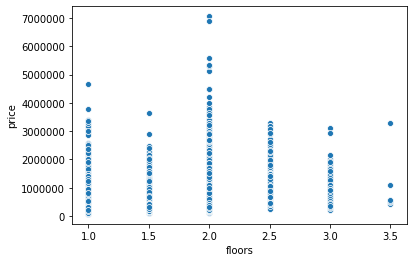

In [16]:
sns.scatterplot(x=data_hp['floors'],y=data_hp['price'])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=data_hp.iloc[:,1:2]
y=data_hp.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 
x.head()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17288, 1)
(17288, 1)
(4322, 1)
(4322, 1)


In [19]:

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lin_reg.coef_

array([[281.02536492]])

In [21]:
lin_reg.intercept_

array([-44979.64015581])

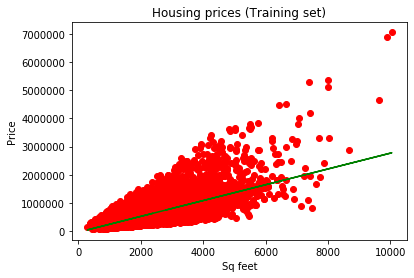

In [22]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Housing prices (Training set)')
plt.xlabel('Sq feet')
plt.ylabel('Price')
plt.show()

In [23]:
ypred=lin_reg.predict(x_test)


In [24]:
ypred

array([[505830.07508758],
       [429953.22655915],
       [275389.2758531 ],
       ...,
       [505830.07508758],
       [947039.89801213],
       [966711.67355654]])

In [25]:
x_test.head()

,sqft_living
9790,1960
10280,1690
21572,1140
20060,2612
21204,2990


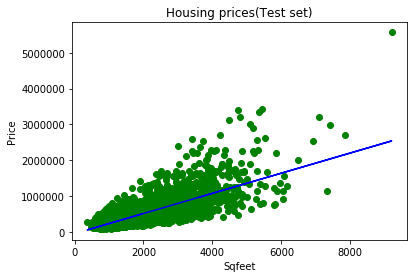

In [26]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Housing prices(Test set)')
plt.xlabel('Sqfeet')
plt.ylabel('Price')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.4928096953859131
The RMSE value is........ 248579.5446335036


# Price vs Bedrooms

In [33]:
x=data_hp.iloc[:,2:3]
y=data_hp.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 
x.head()
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(4322, 1)

In [34]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lin_reg.coef_

array([[125586.39152843]])

In [36]:
lin_reg.intercept_

array([117207.49068986])

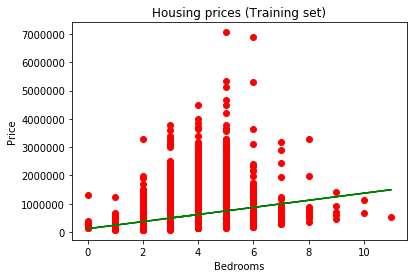

In [37]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Housing prices (Training set)')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [38]:
ypred=lin_reg.predict(x_test)

In [39]:
ypred

array([[368380.27374673],
       [619553.05680359],
       [493966.66527516],
       ...,
       [368380.27374673],
       [493966.66527516],
       [619553.05680359]])

In [40]:
x_test.head()

,bedrooms
9790,2
10280,4
21572,3
20060,4
21204,4


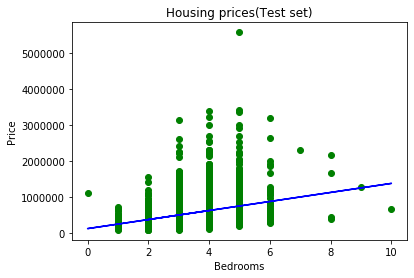

In [41]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Housing prices(Test set)')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10759553042009118
The RMSE value is........ 329731.76323578804


## Price vs Bathrooms

In [44]:
x=data_hp.iloc[:,3:4]
y=data_hp.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 
x.head()
x_train.shape
y_train.shape
x_test.shape
y_test.shape


   bathrooms
0       1.00
1       2.25
2       1.00
3       3.00
4       2.00


In [45]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lin_reg.coef_


array([[249555.11181258]])

In [47]:
lin_reg.intercept_

array([12104.99353132])

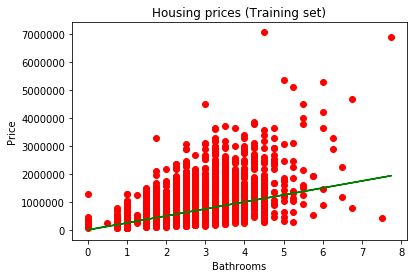

In [48]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Housing prices (Training set)')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [49]:
ypred=lin_reg.predict(x_test)
ypred


array([[386437.6612502 ],
       [698381.55101593],
       [448826.43920335],
       ...,
       [511215.21715649],
       [760770.32896908],
       [947936.66282852]])

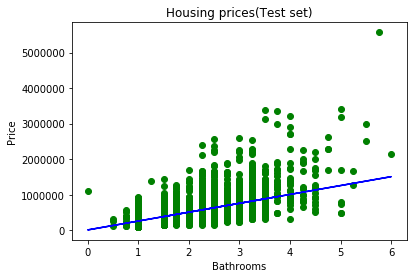

In [50]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Housing prices(Test set)')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.2727567032687025
The RMSE value is........ 297659.5220218017


## Price vs Floors

In [55]:
x=data_hp.iloc[:,-1:]
y=data_hp.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 
x.head()


,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [57]:
in_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lin_reg.coef_



array([[173143.18346428]])

In [59]:
lin_reg.intercept_

array([282613.3518057])

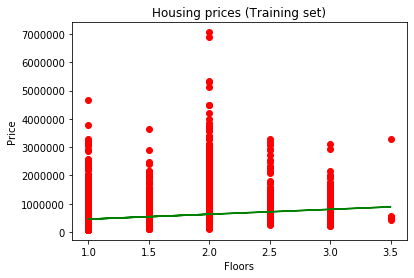

In [60]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Housing prices (Training set)')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()


In [61]:
ypred=lin_reg.predict(x_test)
ypred

array([[455756.53526998],
       [542328.12700212],
       [628899.71873425],
       ...,
       [455756.53526998],
       [628899.71873425],
       [455756.53526998]])

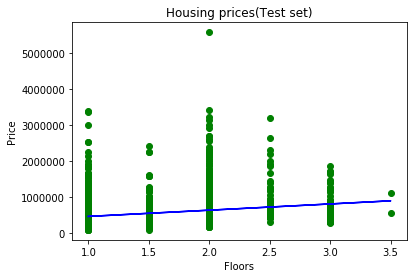

In [62]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Housing prices(Test set)')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.07150552701379065
The RMSE value is........ 336333.0750689506
